<img src= 'https://innovatics.ai/innovatics.jpeg' width=300/>

## Project Guide  
------------  
- [Project Overview](#project-overview)  
- [Part 1: Reading Data - Exploratory Data Analysis with Pandas](#I)
- [Part 2: Visual data analysis in Python](#II)
- [Part 3: Data Pre-processing &  Preparation](#III)
- [Part 4: Predictive Analytics](#IV)
- [Part 5: Optimization (Hyper Parameter Tuning)](#V)

<details>
<summary>
Roadmap for Building Machine Learning Models
</summary>
<p>


    1. Prepare Problem  
    a) Define The Business Objective  
    b) Select the datasets  
    c) Load dataset  
    d) Load libraries  


**Data Pre-processing**  
This is the first step in building a machine learning model. Data pre-processing refers to the transformation of data
before feeding it into the model. It deals with the techniques that are used to convert unusable raw data into clean 
reliable data.  
  
Since data collection is often not performed in a controlled manner, raw data often contains outliers 
(for example, age = 120), nonsensical data combinations (for example, model: bicycle, type: 4-wheeler), missing values, 
scale problems, and so on. Because of this, raw data cannot be fed into a machine learning model because it might 
compromise the quality of the results. As such, this is the most important step in the process of data science.  
  

    2. Summarize Data  
    a) Descriptive statistics  
    b) Data visualizations  

    3. Prepare Data  
    a) Data Cleaning  
    b) Feature Selection  
    c) Data Transformation  

**Model Learning**  
After pre-processing the data and splitting it into train/test sets (more on this later), we move on to modeling. Models 
are nothing but sets of well-defined methods called algorithms that use pre-processed data to learn patterns, which can 
later be used to make predictions. There are different types of learning algorithms, including supervised, semi-supervised, 
unsupervised, and reinforcement learning. These will be discussed later.
  
    4. Modeling Strategy  
    a) Select Suitable Algorithms  
    b) Select Training/Testing Approaches  
    c) Train   
  
  
**Model Evaluation**  
In this stage, the models are evaluated with the help of specific performance metrics. With these metrics, we can go on to 
tune the hyperparameters of a model in order to improve it. This process is called hyperparameter optimization. We will 
repeat this step until we are satisfied with the performance.  
  
    4. Evaluate Algorithms  
    a) Split-out validation dataset  
    b) Test options and evaluation metric  
    c) Spot Check Algorithms  
    d) Compare Algorithms  
  
**Prediction**  
Once we are happy with the results from the evaluation step, we will then move on to predictions. Predictions are made 
by the trained model when it is exposed to a new dataset. In a business setting, these predictions can be shared with 
decision makers to make effective business choices.  
  
    5. Improve Accuracy  
    a) Algorithm Tuning  
    b) Ensembles  

**Model Deployment**  
The whole process of machine learning does not just stop with model building and prediction. It also involves making use 
of the model to build an application with the new data. Depending on the business requirements, the deployment may be a 
report, or it may be some repetitive data science steps that are to be executed. After deployment, a model needs proper 
management and maintenance at regular intervals to keep it up and running.  

    6. Finalize Model  
    a) Predictions on validation dataset  
    b) Create standalone model on entire training dataset  
    c) Save model for later use  


</p>
</details>

<a id="I"></a>

# I.  Reading Data - Exploratory Data Analysis with Pandas

### Article outline
1. Demonstration of main Pandas methods
2. First attempt on predicting Auto Insurance Fraud
3. Useful resources

### Demonstration of main Pandas methods 

**[Pandas](http://pandas.pydata.org)** is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like `.csv`, `.tsv`, or `.xlsx`. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with `Matplotlib` and `Seaborn`, `Pandas` provides a wide range of opportunities for visual analysis of tabular data.

The main data structures in `Pandas` are implemented with **Series** and **DataFrame** classes. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of `Series` instances. `DataFrames` are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')


We’ll demonstrate the main methods in action by analyzing a [dataset](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) on the churn rate of telecom operator clients. Let’s read the data (using `read_csv`), and take a look at the first 5 lines using the `head` method:


In [3]:
# Disply all Columns
pd.options.display.max_columns=70

In [4]:
autinsurance = pd.read_csv('insurance_claimsV2.csv')
autinsurance.head()

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,1,YES,1,2,YES,52080,Saab,92x,1
1,228,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,1,?,0,0,?,3510,Mercedes,E400,1
2,134,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,3,NO,2,3,NO,23100,Dodge,RAM,0
3,256,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,1,?,1,2,NO,50720,Chevrolet,Tahoe,1
4,228,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,1,NO,0,1,NO,4550,Accura,RSX,0


In [4]:
# autinsurance = autinsurance.drop('Unnamed: 0', axis = 1)
# autinsurance = autinsurance.drop('insured_zip', axis = 1)
# autinsurance = autinsurance.drop('incident_city', axis = 1)

In [5]:
autinsurance.shape

(1000, 27)

<details>
<summary>About printing DataFrames in Jupyter notebooks</summary>
<p>
In Jupyter notebooks, Pandas DataFrames are printed as these pretty tables seen above while `print(df.head())` looks worse.
By default, Pandas displays 20 columns and 60 rows, so, if your DataFrame is bigger, use the `set_option` function as shown in the example below:

```python
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
```
</p>
</details>

Recall that each row corresponds to one client, an **instance**, and columns are **features** of this instance.

Let’s have a look at data dimensionality, features names, and feature types.

In [6]:
autinsurance.shape

(1000, 27)

From the output, we can see that the table contains 3333 rows and 20 columns.

Now let’s try printing out column names using `columns`:

We can use the `info()` method to output some general information about the dataframe: 

In [7]:
autinsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_state                 1000 non-null   object 
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_hobbies              1000 non-null   object 
 10  insured_relationship         1000 non-null   object 
 11  capital_gains                1000 non-null   int64  
 12  capital_loss                 1000 non-null   int64  
 13  incident_type      


The `describe` method shows basic statistical characteristics of each numerical feature (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [8]:
autinsurance.describe() # Similar to summary() in R

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital_gains,capital_loss,number_of_vehicles_involved,bodily_injuries,witnesses,vehicle_claim,fraud_reported
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,1.83900,0.992000,1.487000,37928.950000,0.247000
std,115.113174,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,1.01888,0.820127,1.111335,18886.252893,0.431483
min,0.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,1.00000,0.000000,0.000000,70.000000,0.000000
25%,115.750000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,1.00000,0.000000,1.000000,30292.500000,0.000000
50%,199.500000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,1.00000,1.000000,1.000000,42100.000000,0.000000
75%,276.250000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,3.00000,2.000000,2.000000,50822.500000,0.000000
max,479.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,4.00000,2.000000,3.000000,79560.000000,1.000000


In [9]:
autinsurance.describe().transpose()  # change the rows and columns

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
capital_gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital_loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00
bodily_injuries,1000.0,9.920000e-01,8.201272e-01,0.00,0.0000,1.0,2.000,2.00
witnesses,1000.0,1.487000e+00,1.111335e+00,0.00,1.0000,1.0,2.000,3.00
vehicle_claim,1000.0,3.792895e+04,1.888625e+04,70.00,30292.5000,42100.0,50822.500,79560.00


In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

In [10]:
autinsurance.describe(include=['object', 'bool', 'character'])

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,property_damage,police_report_available,auto_make,auto_model
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,3,3,2,7,14,20,6,4,4,4,5,7,3,3,14,39
top,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,?,?,Saab,RAM
freq,352,351,537,161,93,64,183,419,292,354,292,262,360,343,80,43


For categorical (type `object`) and boolean (type `bool`) features we can use the `value_counts` method. Let’s have a look at the distribution of `Churn`:

In [11]:
autinsurance['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

753 users out of 247 are *loyal*; their `Fraud` value is `0`. To calculate fractions, pass `normalize=True` to the `value_counts` function.

In [12]:
autinsurance['fraud_reported'].value_counts(normalize=True)

0    0.753
1    0.247
Name: fraud_reported, dtype: float64

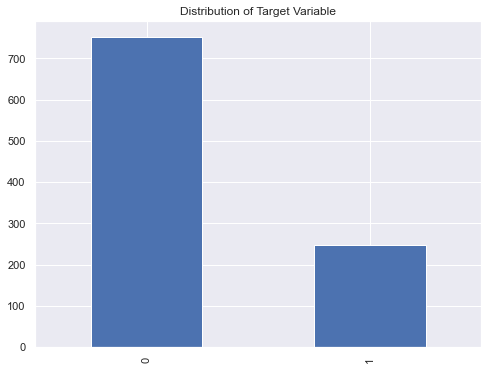

In [13]:
(autinsurance['fraud_reported'].value_counts().plot(
        kind='bar',
        figsize=(8, 6),
        title='Distribution of Target Variable',
    )
);
plt.show()

<a id="III"></a>
# III- Data Pre-processing &  Preparation

### Data Transformation

There are some algorithms that can work well with categorical data, such as decision trees. But most machine learning algorithms cannot operate directly with categorical data. These algorithms require the input and output both to be in numerical form. If the output to be predicted is categorical, then after prediction we convert them back to categorical data from numerical data. Let's discuss some key challenges that we face while dealing with categorical data:

####  Fixing Special Characters

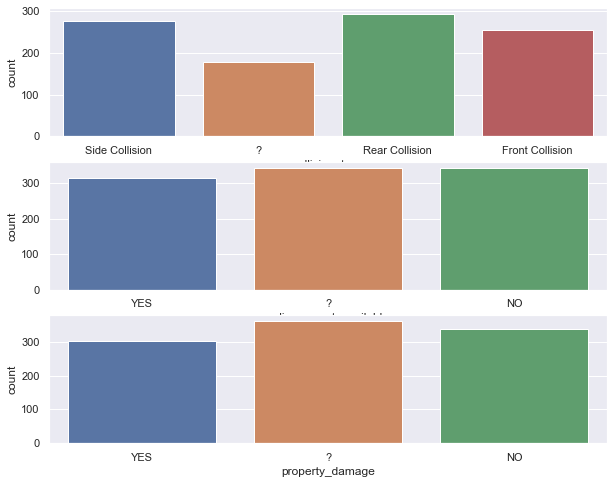

In [14]:
autinsurance_copy = autinsurance.copy()

_, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))

sns.countplot(x='collision_type', data=autinsurance, ax=axes[0]);
sns.countplot(x='police_report_available', data=autinsurance, ax=axes[1]);
sns.countplot(x='property_damage', data=autinsurance, ax=axes[2]);

In [15]:
autinsurance.collision_type.value_counts(normalize = True)

Rear Collision     0.292
Side Collision     0.276
Front Collision    0.254
?                  0.178
Name: collision_type, dtype: float64

In [16]:
autinsurance.police_report_available.value_counts(normalize = True)

?      0.343
NO     0.343
YES    0.314
Name: police_report_available, dtype: float64

In [17]:
autinsurance.property_damage.value_counts(normalize = True)

?      0.360
NO     0.338
YES    0.302
Name: property_damage, dtype: float64

In [18]:
autinsurance = autinsurance.replace(to_replace = "?",  value ="Unknown")

###  2. Encoding Categorical Data!
Find unique values - first

#### Simple Replacement of Categorical Data with a Number (Mapping & Dictionary)

Find the categorical column and separate it out with a different dataframe. To do so, use the select_dtypes() function from pandas:

In [19]:
#autinsurance = pd.read_csv('insurance_claims.csv')

autinsurance_copy = autinsurance.copy()

autinsurance_copy_categorical = autinsurance_copy.select_dtypes(exclude=[np.number])

autinsurance_copy_categorical.head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,property_damage,police_report_available,auto_make,auto_model
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,YES,YES,Saab,92x
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Unknown,Minor Damage,Police,VA,Unknown,Unknown,Mercedes,E400
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,NO,NO,Dodge,RAM
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Unknown,NO,Chevrolet,Tahoe
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Unknown,Minor Damage,None,NY,NO,NO,Accura,RSX


In [20]:
autinsurance_copy_categorical.describe()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,property_damage,police_report_available,auto_make,auto_model
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,3,3,2,7,14,20,6,4,4,4,5,7,3,3,14,39
top,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Unknown,Unknown,Saab,RAM
freq,352,351,537,161,93,64,183,419,292,354,292,262,360,343,80,43


We could also extract the categorial featuers using boolean mask

In [21]:
# Categorical boolean mask
categorical_feature_mask = autinsurance_copy.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = autinsurance_copy.columns[categorical_feature_mask].tolist()

categorical_cols

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model']

#### Find Unique Values

Find the distinct unique values in the Geography and Gender column. To do so, use the unique() function from pandas with the column name:

In [22]:
print(autinsurance_copy_categorical['insured_sex'].unique())
print(autinsurance_copy_categorical['incident_type'].unique())

['MALE' 'FEMALE']
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']


#### Conversion with Replace Method

In [23]:
autinsurance_copy_categorical.insured_sex.replace({"MALE":1, 
                                                   "FEMALE":2}, inplace= True)



autinsurance_copy_categorical.incident_type.replace({"Single Vehicle Collision":1, 
                                                                "Vehicle Theft":2, 
                                                      "Multi-vehicle Collision":3, 
                                                                 "  Parked Car":4}, inplace= True)

In [24]:
autinsurance_copy_categorical.insured_sex.head(2)
autinsurance_copy_categorical.incident_type.head(2)

0    1
1    2
Name: incident_type, dtype: object

#### Conversion with Where Method

In [25]:
print(autinsurance_copy['insured_sex'])
autinsurance_copy['insured_sex']=np.where(autinsurance_copy['insured_sex']=='MALE', 1, 0)
autinsurance_copy['insured_sex'].head(3)

0      1
1      1
2      2
3      2
4      1
      ..
995    2
996    2
997    2
998    1
999    2
Name: insured_sex, Length: 1000, dtype: object


0    0
1    0
2    0
Name: insured_sex, dtype: int32

#### Label Encoding

This is a technique in which we replace each value in a categorical column with numbers from 0 to N-1. For example, say we've got a list of employee names in a column. After performing label encoding, each employee name will be assigned a numeric label. But this might not be suitable for all cases because the model might consider numeric values to be weights assigned to the data. Label encoding is the **best method to use for ordinal data**. The scikit-learn library provides LabelEncoder(), which helps with label encoding. Let's look at an exercise in the next section.

Before doing the encoding, remove all the missing data. To do so, use the dropna() function, Select all the columns that are not numeric using the following code:

In [26]:
autinsurance_copy = autinsurance.copy()

data_column_category = autinsurance_copy.select_dtypes(exclude=[np.number]).columns
data_column_category

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model'],
      dtype='object')

In [27]:
data_column_category =[
    'policy_csl', 
    'insured_sex',
    'insured_education_level', 
    'insured_occupation', 
    'insured_hobbies',
    'insured_relationship', 
    'incident_type',
    'collision_type', 
    'incident_severity', 
    'authorities_contacted',
    'incident_state', 
    'property_damage', 
    'police_report_available', 
    'auto_make', 'auto_model']

Iterate through this category column and convert it to numeric data using LabelEncoder(). To do so, import the sklearn.preprocessing package and use the LabelEncoder() class to transform the data:

In [28]:
#import the LabelEncoder class

from sklearn.preprocessing import LabelEncoder

#Creating the object instance

label_encoder = LabelEncoder()

for i in data_column_category:

    autinsurance_copy[i] = label_encoder.fit_transform(autinsurance_copy[i])

print("Label Encoded Data: ")

autinsurance_copy.head()

Label Encoded Data: 


,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,OH,1,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,2,1,2,2,52080,10,1,1
1,228,IN,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,3,1,4,5,1,1,0,0,1,3510,8,12,1
2,134,OH,0,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,3,0,2,3,0,23100,4,30,0
3,256,IL,1,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,1,1,1,2,0,50720,3,34,1
4,228,IL,2,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,3,1,2,1,1,0,0,1,0,4550,0,31,0


In [29]:
autinsurance_copy.columns

Index(['months_as_customer', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported'],
      dtype='object')

In [30]:
autinsurance_copy

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,OH,1,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,2,1,2,2,52080,10,1,1
1,228,IN,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,3,1,4,5,1,1,0,0,1,3510,8,12,1
2,134,OH,0,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,3,0,2,3,0,23100,4,30,0
3,256,IL,1,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,1,1,1,2,0,50720,3,34,1
4,228,IL,2,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,3,1,2,1,1,0,0,1,0,4550,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,OH,2,1000,1310.80,0,0,5,2,13,4,0,0,2,0,1,1,0,1,2,0,1,1,61040,6,6,0
996,285,IL,0,1000,1436.79,0,0,6,9,17,5,70900,0,2,1,0,1,4,1,2,2,3,1,72320,13,28,0
997,130,OH,1,500,1383.49,3000000,0,5,1,3,2,35100,0,0,2,1,4,0,3,1,2,3,2,52500,11,19,0
998,458,IL,2,2000,1356.92,5000000,1,0,5,0,5,0,0,2,1,0,3,1,1,1,0,1,2,36540,1,5,0


#### LabelBinarizer Encoding

In [31]:
autinsurance_copy = autinsurance.copy()

data_column_category = autinsurance_copy.select_dtypes(exclude=[np.number]).columns
data_column_category

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model'],
      dtype='object')

In [32]:
from sklearn.preprocessing import LabelBinarizer 

lb_encoder = LabelBinarizer() 

# lb_results = lb.fit_transform(autinsurance_copy[i])

# lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

# print(lb_results_df.head())


for i in data_column_category:

    autinsurance_copy[i] = lb_encoder .fit_transform(autinsurance_copy[i])

print("Label Encoded Data: ")

autinsurance_copy.head()


Label Encoded Data: 


,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,0,0,1000,1406.91,0,1,0,0,0,1,53300,0,0,0,1,0,0,1,0,1,2,0,52080,0,0,1
1,228,0,0,2000,1197.22,5000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3510,0,0,1
2,134,0,1,2000,1413.14,5000000,0,0,0,0,0,35100,0,1,0,0,0,0,3,1,2,3,1,23100,0,0,0
3,256,1,0,2000,1415.74,6000000,0,0,0,0,0,48900,-62400,0,1,1,0,0,1,0,1,2,1,50720,0,0,1
4,228,1,0,1000,1583.91,6000000,1,1,0,0,0,66000,-46000,0,0,0,0,0,1,1,0,1,1,4550,1,0,0


#### 2.2 One-Hot Encoding

In label encoding, categorical data is converted to numerical data, and the values are assigned labels (such as 1, 2, and 3). Predictive models that use this numerical data for analysis might sometimes mistake these labels for some kind of order (for example, a model might think that a label of 3 is "better" than a label of 1, which is incorrect). In order to avoid this confusion, we can use one-hot encoding. Here, the label-encoded data is further divided into n number of columns. Here, n denotes the total number of unique labels generated while performing label encoding. For example, say that three new labels are generated through label encoding. Then, while performing one-hot encoding, the columns will be divided into three parts. So, the value of n is 3. Let's look at an exercise to get further clarification.

Once we have performed label encoding, we execute one-hot encoding. Add the following code to implement this:

In [33]:
autinsurance_copy = autinsurance.copy()

data_column_category = autinsurance_copy.select_dtypes(exclude=[np.number]).columns
data_column_category

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model'],
      dtype='object')

In [34]:
#Performing Onehot Encoding
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

onehot_encoded = onehot_encoder.fit_transform(autinsurance_copy[data_column_category])

Now we create a new dataframe with the encoded data and print the first five rows. Add the following code to do this:


In [35]:
onehot_encoded_frame = pd.DataFrame(onehot_encoded, columns = onehot_encoder.get_feature_names(data_column_category))

onehot_encoded_frame.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,...,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
onehot_encoded_frame.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'policy_csl_100/300', 'policy_csl_250/500', 'policy_csl_500/1000',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       ...
       'auto_model_Pathfinder', 'auto_model_RAM', 'auto_model_RSX',
       'auto_model_Silverado', 'auto_model_TL', 'auto_model_Tahoe',
       'auto_model_Ultima', 'auto_model_Wrangler', 'auto_model_X5',
       'auto_model_X6'],
      dtype='object', length=138)

For every level or category, a new column is created. In order to prefix the category name with the column name you can use this alternate way to create one-hot encoding. In order to prefix the category name with the column name, write the following code:

#### 2.3  Dummy Varaibles

In [37]:
autinsurance_copy = autinsurance.copy()

data_column_category = autinsurance_copy.select_dtypes(exclude=[np.number]).columns
data_column_category

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model'],
      dtype='object')

In [38]:
autinsurance_copy.shape

(1000, 27)

In [39]:
autinsurance_copy.describe(include=['object', 'bool'])

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,property_damage,police_report_available,auto_make,auto_model
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,3,3,2,7,14,20,6,4,4,4,5,7,3,3,14,39
top,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Unknown,Unknown,Saab,RAM
freq,352,351,537,161,93,64,183,419,292,354,292,262,360,343,80,43


In [40]:
# to_delete = ['policy_bind_date' , 'incident_date']

In [41]:
# autinsurance_copy = autinsurance_copy.drop(to_delete , axis = 1)

In [42]:
# Categorical boolean mask
categorical_feature_mask = autinsurance_copy.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = autinsurance_copy.columns[categorical_feature_mask].tolist()

categorical_cols

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model']

In [43]:
autinsurance_copy.columns

Index(['months_as_customer', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported'],
      dtype='object')

In [44]:
# autinsurance_copy = autinsurance_copy[['months_as_customer', 
#        'policy_state', 'policy_csl', 'policy_deductable',
#        'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
#        'insured_education_level', 'insured_occupation', 'insured_hobbies',
#        'insured_relationship', 'capital_gains', 'capital_loss',
#         'incident_type', 'collision_type', 'incident_severity',
#        'authorities_contacted', 'incident_state',
#        'incident_hour_of_the_day',
#        'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
#        'witnesses', 'police_report_available', 
#        'vehicle_claim',  'auto_make',
#        'auto_model', 'auto_year', 'fraud_reported']]

In [45]:
# Create dummy variables for the categorical features
to_dummy = autinsurance_copy.select_dtypes(exclude=[np.number]).columns



autinsurance_copy  = pd.get_dummies(autinsurance_copy, prefix = to_dummy, columns = to_dummy, drop_first = True)
autinsurance_copy.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital_gains,capital_loss,number_of_vehicles_involved,bodily_injuries,witnesses,vehicle_claim,fraud_reported,policy_state_IN,policy_state_OH,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,...,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,1000,1406.91,0,53300,0,1,1,2,52080,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,228,2000,1197.22,5000000,0,0,1,0,0,3510,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,134,2000,1413.14,5000000,35100,0,3,2,3,23100,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,256,2000,1415.74,6000000,48900,-62400,1,1,2,50720,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,228,1000,1583.91,6000000,66000,-46000,1,0,1,4550,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [46]:
autinsurance['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [47]:
pd.options.display.max_rows = 999
autinsurance_copy.columns

Index(['months_as_customer', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'capital_gains', 'capital_loss',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'vehicle_claim',
       ...
       'auto_model_Pathfinder', 'auto_model_RAM', 'auto_model_RSX',
       'auto_model_Silverado', 'auto_model_TL', 'auto_model_Tahoe',
       'auto_model_Ultima', 'auto_model_Wrangler', 'auto_model_X5',
       'auto_model_X6'],
      dtype='object', length=133)

In [48]:
autinsurance_copy.shape

(1000, 133)

#### 2.4  Correlation

In [49]:
autinsurance_copy.shape

(1000, 133)

In [50]:
# Disply all Columns
pd.options.display.max_columns=70

# Calculate Correlation
corr_matrix = autinsurance_copy.corr()  # corr(autinsurance)
corr_matrix


,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital_gains,capital_loss,number_of_vehicles_involved,bodily_injuries,witnesses,vehicle_claim,fraud_reported,policy_state_IN,policy_state_OH,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,...,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
months_as_customer,1.000000,0.026807,0.005018,0.015498,0.006399,0.020209,0.014736,-0.010162,0.058383,0.061013,0.020544,0.009288,-0.004783,-0.005078,-2.088569e-02,0.060925,-0.034985,-2.986339e-02,-0.041588,0.059231,0.012031,-1.343589e-02,-0.022490,0.021728,-0.003231,-0.000293,-0.000327,-0.009388,-0.020059,0.005999,0.001649,-0.003545,0.009823,-0.007241,0.022673,...,0.006709,-0.047632,-0.053972,0.029668,-4.501426e-02,-0.039340,0.023287,-1.043471e-02,0.056693,-1.055679e-02,0.002426,0.043111,0.036428,0.004963,-0.010546,-3.605710e-03,0.005278,-0.009705,-0.023976,-0.009860,0.074555,-0.005279,-0.000164,-0.065765,0.039533,-0.037639,0.001113,-0.000036,-0.021153,0.005893,0.048503,-0.014724,0.016722,-0.025740,0.006562
policy_deductable,0.026807,1.000000,-0.003245,0.010870,0.035212,-0.023544,0.051214,-0.022765,0.066639,0.005269,0.014817,-0.046528,0.031252,-0.002522,4.281870e-03,-0.009733,-0.000460,-3.238164e-02,-0.035130,0.057826,-0.016105,1.977711e-02,0.042683,0.005847,-0.011329,0.053223,0.048154,-0.012093,0.011740,-0.004177,-0.108823,0.019733,0.038035,-0.025048,-0.027151,...,0.034373,0.057119,0.046656,0.006789,9.110211e-03,0.021727,-0.061223,9.110211e-03,-0.026956,-1.884647e-02,-0.001735,-0.017920,0.035854,0.016758,-0.027780,1.495009e-02,0.006584,0.010666,-0.007264,0.062356,-0.043449,-0.005560,0.002521,-0.004608,0.000110,-0.002038,0.009286,-0.017000,-0.016632,-0.055128,0.013205,-0.001396,0.018651,0.025874,-0.034873
policy_annual_premium,0.005018,-0.003245,1.000000,-0.006247,-0.013738,0.023547,-0.045991,0.026780,0.002332,0.020246,-0.014480,-0.002779,0.012175,0.017755,1.179164e-02,0.038853,-0.004849,5.068730e-02,-0.015147,0.013907,-0.046716,2.503287e-03,-0.023277,0.011182,-0.047947,0.021637,0.035004,-0.044647,0.057128,-0.000126,0.004044,0.017947,-0.025682,0.004464,0.031430,...,0.001783,0.021607,-0.049266,0.019661,-3.892700e-02,0.038196,0.032019,-1.793373e-03,-0.107662,-3.821054e-02,0.004204,-0.034018,0.023202,0.060346,-0.032778,1.241213e-02,0.035953,-0.036928,-0.004210,0.036802,-0.012807,0.003808,-0.022207,-0.008627,-0.003951,-0.038207,0.003909,0.002484,0.008357,-0.038047,0.010893,-0.017260,0.027322,-0.012346,-0.004280
umbrella_limit,0.015498,0.010870,-0.006247,1.000000,-0.047268,-0.024056,-0.021270,0.022743,-0.006738,-0.038584,0.058622,-0.010650,-0.020564,0.029699,3.516183e-03,0.010688,0.011547,3.373635e-03,0.011540,0.022893,-0.030407,-1.794142e-02,-0.010256,0.022502,-0.022475,-0.025956,-0.029777,-0.009586,0.025145,0.033624,-0.021214,0.011896,0.012036,0.037548,-0.

<AxesSubplot:>

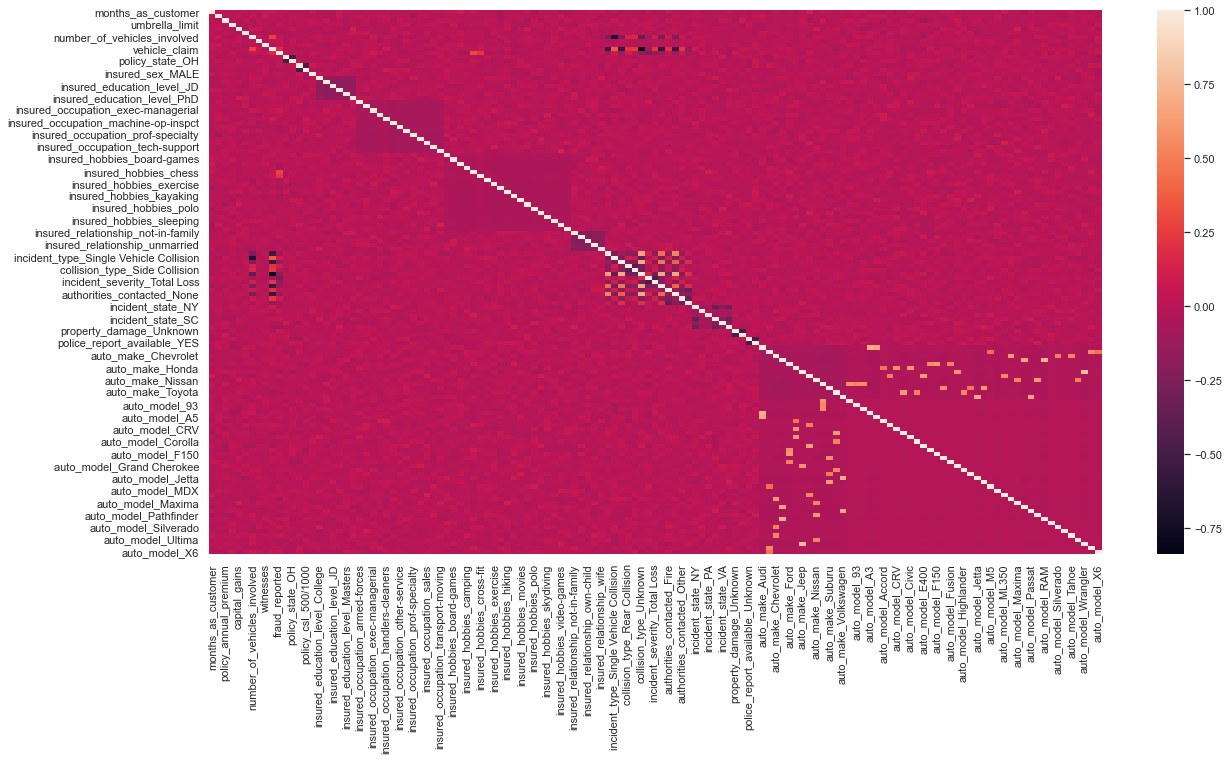

In [51]:
#### 4.2 Correlation heatmap of the numberic variables
plt.rcParams['figure.figsize'] = 20,10  # control plot sizeimport seaborn as sns
sns.heatmap(autinsurance_copy.corr())

In [52]:
c = corr_matrix.abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

#first element of sol series is the pair with the biggest correlation
sol

auto_make_Jeep               auto_model_Wrangler                       0.781349
auto_make_Audi               auto_model_A3                             0.720009
auto_make_Dodge              auto_model_RAM                            0.718832
auto_make_Volkswagen         auto_model_Jetta                          0.705056
incident_type_Vehicle Theft  collision_type_Unknown                    0.692191
                                                                         ...   
vehicle_claim                incident_severity_Trivial Damage         -0.567048
                             authorities_contacted_None               -0.571421
                             incident_type_Vehicle Theft              -0.578976
number_of_vehicles_involved  incident_type_Single Vehicle Collision   -0.676895
vehicle_claim                collision_type_Unknown                   -0.838674
Length: 8778, dtype: float64

<AxesSubplot:>

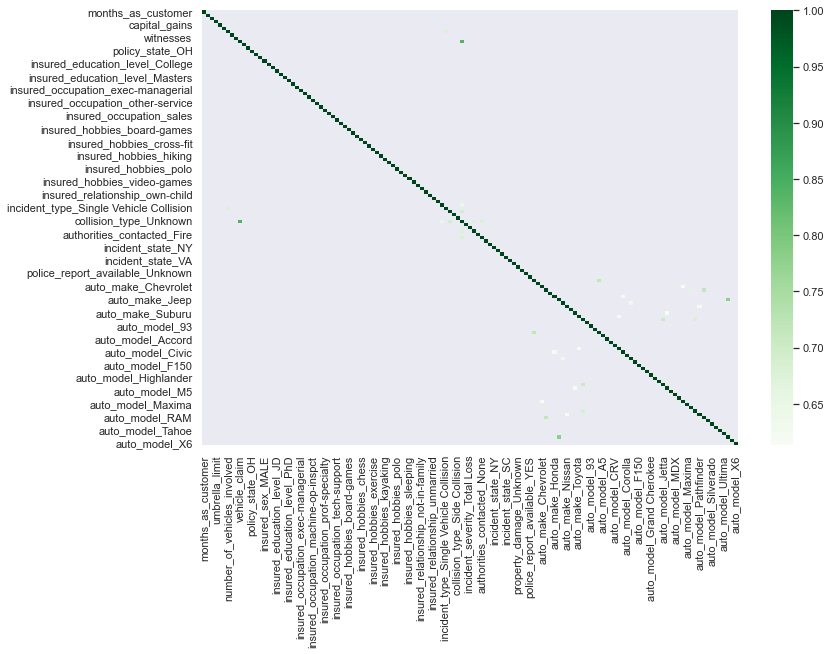

In [53]:
corr = corr_matrix.abs()

kot = corr[corr>=.6]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [56]:
# Save to file
autinsurance_copy.to_csv("insurance_claimsV33.csv", index = False)
